In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dlt_df = pd.read_csv("大乐透.csv")
ssq_df = pd.read_csv("双色球.csv")



In [3]:
dlt_df.columns,dlt_df.dtypes



(Index(['Unnamed: 0', 'no', 'num1', 'num2', 'num3', 'num4', 'num5', 'num6',
        'num7', 'bonus_pool', 'one_count', 'one_bonus', 'two_count',
        'two_bonus', 'sale', 'date'],
       dtype='object'),
 Unnamed: 0      int64
 no              int64
 num1            int64
 num2            int64
 num3            int64
 num4            int64
 num5            int64
 num6            int64
 num7            int64
 bonus_pool    float64
 one_count       int64
 one_bonus     float64
 two_count       int64
 two_bonus     float64
 sale          float64
 date           object
 dtype: object)

No handles with labels found to put in legend.


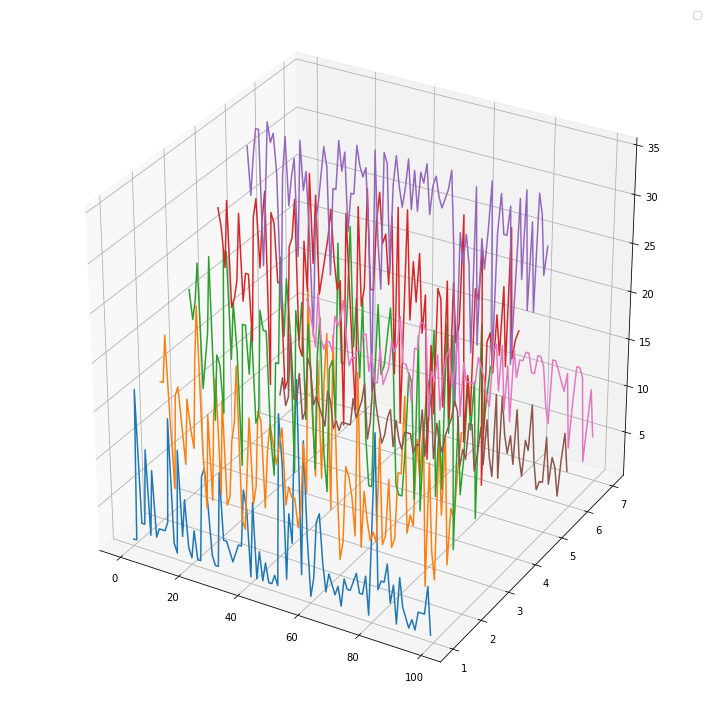

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
a = np.random.randint(0,5,size=100)
for i in range(1,8):
    z = dlt_df["num"+str(i)][:100] # 前100
    y = np.full_like(a,i)
    x = range(100) # 100
    ax.plot(x, y, z)
ax.legend()
#ax.set_xlim=[0,8]
plt.tight_layout()
# plt.savefig('img_3d.png')
plt.show()

In [17]:
# 二维数组
data = dlt_df.values
# [1:,2:]  逗号前面是行，后面是列
data = data[1:,2:9]
# pd.read_csv(r'大乐透.csv',sep=',',header=None,error_bad_lines=False).values
print(data.dtype)
data = data.astype(np.float64)
print(data.dtype)

object
float64


In [20]:
# 使用神经网络预测
mean = data[:1500].mean(axis=0)
std = data[:1500].std(axis=0)
data1 = data.copy()
data1 -= mean
data1 /= std
train_data = data1[:1400]
train_data= np.expand_dims(train_data,axis=1)
val_data = data1[1400:1550]
val_data = np.expand_dims(val_data,axis=1)
test_data = data1[1550:len(data)-1]
test_data = np.expand_dims(test_data,axis=1)
red1_labels = data[:,0]
red2_labels = data[:,1]
red3_labels = data[:,2]
red4_labels = data[:,3]
red5_labels = data[:,4]
blue1_labels = data[:,5]
blue2_labels = data[:,6]
train_labels_1 = red1_labels[1:1401]
train_labels_2 = red2_labels[1:1401]
train_labels_3 = red3_labels[1:1401]
train_labels_4 = red4_labels[1:1401]
train_labels_5 = red5_labels[1:1401]
train_labels_6 = blue1_labels[1:1401]
train_labels_7 = blue2_labels[1:1401]
val_labels_1 = red1_labels[1401:1551]
val_labels_2 = red2_labels[1401:1551]
val_labels_3 = red3_labels[1401:1551]
val_labels_4 = red4_labels[1401:1551]
val_labels_5 = red5_labels[1401:1551]
val_labels_6 = blue1_labels[1401:1551]
val_labels_7 = blue2_labels[1401:1551]
test_labels_1 = red1_labels[1551:]
test_labels_2 = red2_labels[1551:]
test_labels_3 = red3_labels[1551:]
test_labels_4 = red4_labels[1551:]
test_labels_5 = red5_labels[1551:]
test_labels_6 = blue1_labels[1551:]
test_labels_7 = blue2_labels[1551:]

from keras import layers
from keras import Model
from keras import Input
from keras.optimizers import RMSprop

post_input = Input(shape=(None,7),name='post_input')
lstm = layers.LSTM(150,dropout=0.2,recurrent_dropout=0.2,activation='relu',return_sequences=True)(post_input)
lstm1=layers.LSTM(250,dropout=0.2,recurrent_dropout=0.2,activation='relu')(lstm)
x= layers.Dense(360,activation='relu')(lstm1)
x=layers.Dense(250,activation='relu')(x)
x=layers.Dense(250,activation='relu')(x)
x= layers.Dense(250,activation='relu')(x)
x= layers.Dense(250,activation='relu')(x)
x= layers.Dense(250,activation='relu')(x)
x= layers.Dense(140,activation='relu')(x)
x= layers.Dense(70,activation='relu')(x)
#x=layers.Dropout(0.3)(x)
red1_predict = layers.Dense(1,name='red1')(x)
red2_predict = layers.Dense(1,name='red2')(x)
red3_predict = layers.Dense(1,name='red3')(x)
red4_predict = layers.Dense(1,name='red4')(x)
red5_predict = layers.Dense(1,name='red5')(x)
blue1_predict = layers.Dense(1,name='blue1')(x)
blue2_predict = layers.Dense(1,name='blue2')(x)
model = Model(post_input,[red1_predict,red2_predict,red3_predict,red4_predict,red5_predict,blue1_predict,blue2_predict])
model.compile(optimizer = RMSprop(1e-4),loss=['mse','mse','mse','mse','mse','mse','mse'],metrics=['acc','acc','acc','acc','acc','acc','acc'])

history= model.fit(train_data,
                   [train_labels_1,train_labels_2,train_labels_3,train_labels_4,train_labels_5,train_labels_6,train_labels_7],
                   batch_size=20,epochs=50,
                   validation_data=(val_data,[val_labels_1,val_labels_2,val_labels_3,val_labels_4,val_labels_5,val_labels_6,val_labels_7]))

loss = history.history['loss']
loss = loss[3:]
val_loss = history.history['val_loss']
val_loss = val_loss[3:]
epochs = range(1,len(loss)+1)
plt.figure()
plt.plot(epochs, loss, 'b',color='r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
# 损失图像

Epoch 1/50


ValueError: in user code:

    d:\programdata\miniconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    d:\programdata\miniconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    d:\programdata\miniconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    d:\programdata\miniconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    d:\programdata\miniconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:543 train_step  **
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    d:\programdata\miniconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:391 update_state
        self._build(y_pred, y_true)
    d:\programdata\miniconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:333 _build
        self._set_metric_names()
    d:\programdata\miniconda3\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:353 _set_metric_names
        m._name))

    ValueError: Found two metrics with the same name: red1_acc


In [ ]:
# 预测
predict_data = data1[1401]
print(data[1402])
predict_data = predict_data.reshape(1,1,7)
predict = model.predict(predict_data)
print(predict)


